In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy.stats as stats
import pandas as pd
import itertools

In [2]:
data_source = ["results/PairwiseCRot-nm.csv", "results/PairwiseCRot-adagrad.csv", "results/PairwiseCRot-adam.csv"]
circuit_library = ["Layered", "HardwareEfficient",
                    "ParameterizedAB", "StronglyEntangled", "PairwiseCRot"]
optimizers = ["adam", "adagrad", "nm"]
datasets = ["iris", "banknote", "transfusion", "synth"]
iteration_index = 3
it_num = 0
test_accuracy_index = 7
tests = {1:"Layered", 2:"HardwareEfficient",
                    3:"ParameterizedAB", 4:"StronglyEntangled", 5:"PairwiseCRot"}

dictionary = {}
head = ['optimizer', 'circuit', 'dataset', 'iteration', 'epoch', 'cost', 'train_acc', 'test_acc', 'trained_weights', 'untrained_weights', 'shape']
for source in data_source:
    with open(source, newline="") as csvfile:
        reader = csv.reader(csvfile)
        test_accuracy = np.array([])
        iteration = np.array([])
        for row in reader:
            if row[0] == 'optimizer':
                continue
            else:
                if(int(row[4]) % 5 == 0):
                    iteration = np.append(iteration, row[4]) 
                    test_accuracy = np.append(test_accuracy, row[test_accuracy_index])
            if(int(row[4]) == 99 and row[0] != 'optimizer'):
                dictionary[row[0], row[1], row[2], row[3]] = (test_accuracy.astype(float)), (iteration.astype(float))
                test_accuracy = np.array([])
                iteration = np.array([])
results = {}
for opt in optimizers:
    for data in datasets:
        results[opt, 'PairwiseCRot', data] = (((dictionary[opt, row[1], data, '0'][0]) + (dictionary[opt, row[1], data, '1'][0]) + (dictionary[opt, row[1], data, '2'][0])) / 3), dictionary[opt, row[1], data, '0'][1]
#print(results)


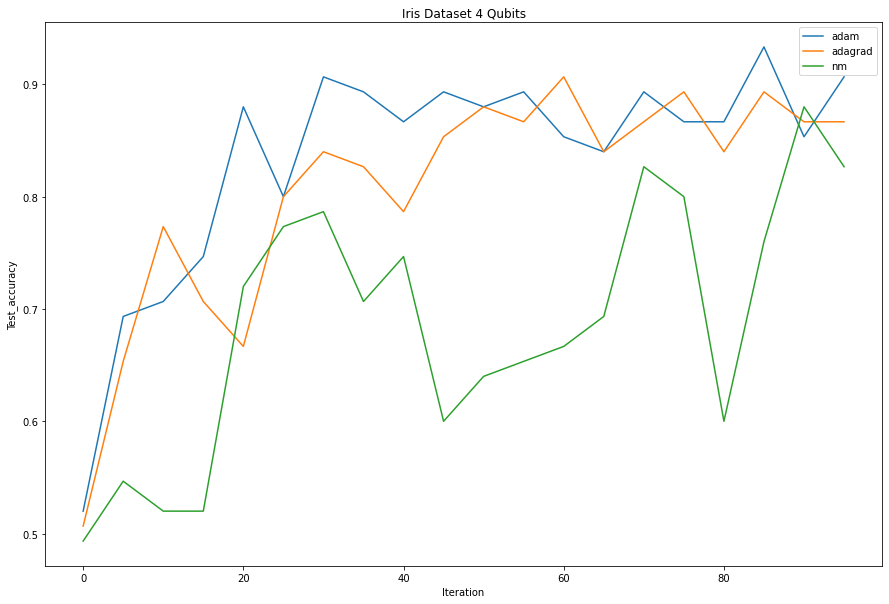

In [3]:
fig_x = 15
fig_y = 10

plt.figure(figsize=(fig_x, fig_y))
plt.title("Iris Dataset 4 Qubits")
plt.xlabel("Iteration")
plt.ylabel("Test_accuracy")
for opt in optimizers:
    plt.plot(results[opt, row[1], 'iris'][1], results[opt, row[1], 'iris'][0], label = opt)

plt.legend()
plt.show()

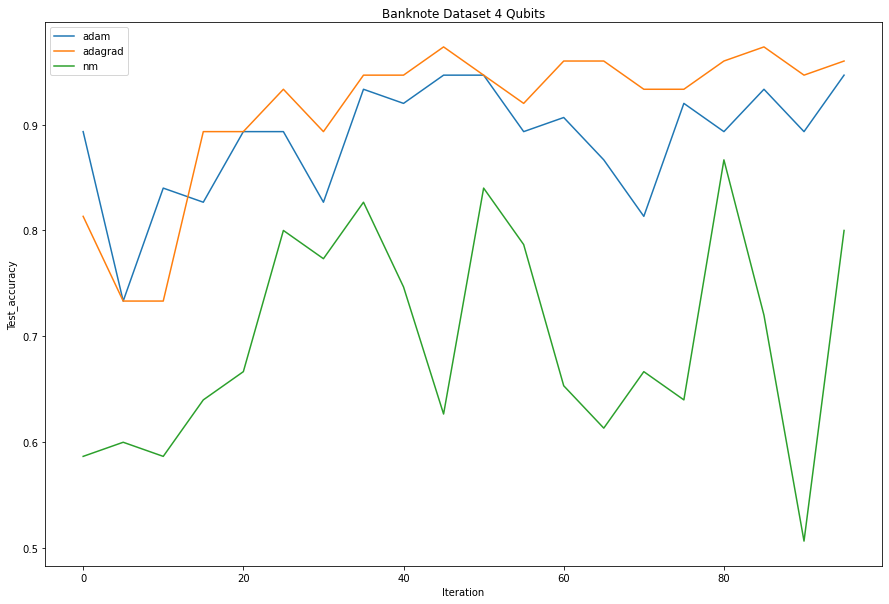

In [4]:
fig_x = 15
fig_y = 10

plt.figure(figsize=(fig_x, fig_y))
plt.title("Banknote Dataset 4 Qubits")
plt.xlabel("Iteration")
plt.ylabel("Test_accuracy")
for opt in optimizers:
    plt.plot(results[opt, row[1], 'banknote'][1], results[opt, row[1], 'banknote'][0], label = opt)


plt.legend()
plt.show()

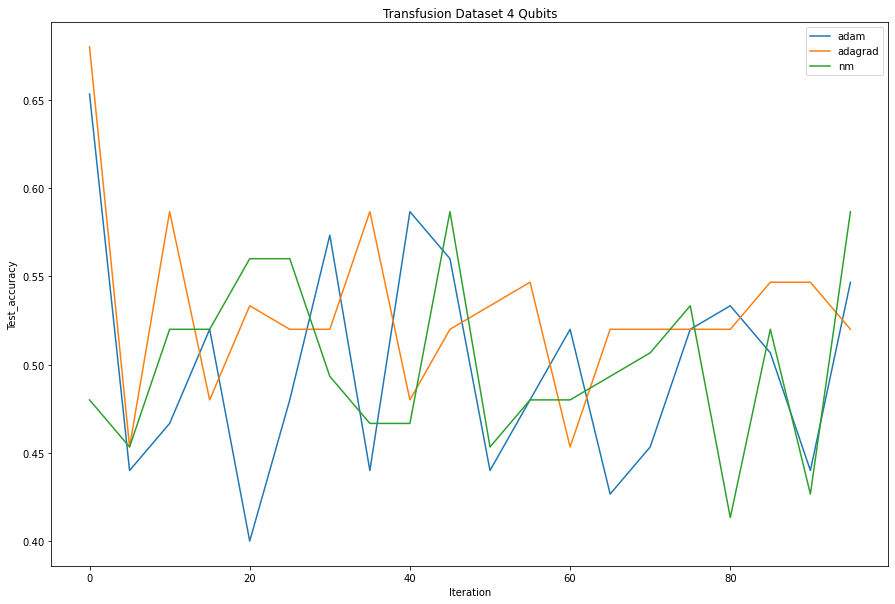

In [5]:
fig_x = 15
fig_y = 10

plt.figure(figsize=(fig_x, fig_y))
plt.title("Transfusion Dataset 4 Qubits")
plt.xlabel("Iteration")
plt.ylabel("Test_accuracy")
for opt in optimizers:
    plt.plot(results[opt, row[1], 'transfusion'][1], results[opt, row[1], 'transfusion'][0], label = opt)


plt.legend()
plt.show()

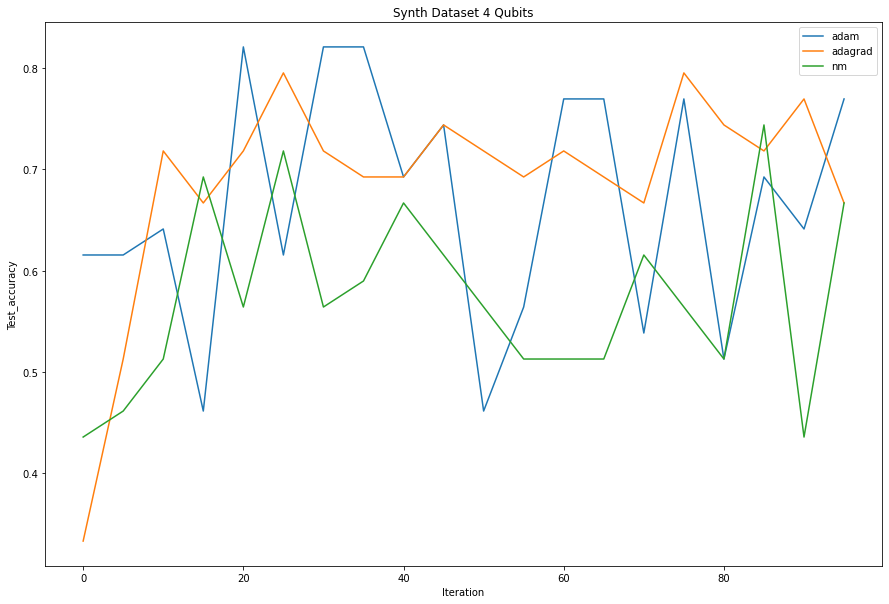

In [6]:
fig_x = 15
fig_y = 10

plt.figure(figsize=(fig_x, fig_y))
plt.title("Synth Dataset 4 Qubits")
plt.xlabel("Iteration")
plt.ylabel("Test_accuracy")
for opt in optimizers:
    plt.plot(results[opt, row[1], 'synth'][1], results[opt, row[1], 'synth'][0], label = opt)


plt.legend()
plt.show()